In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
price = pd.read_csv('agrodata.csv')
price.head()

,Date,Price
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67


In [27]:
price['Date'] = pd.to_datetime(price['Date'], format = '%d/%m/%Y')
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      988 non-null    datetime64[ns]
 1   Target    988 non-null    float64       
 2   Training  988 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.3 KB


In [22]:
weather = pd.read_csv('agroweather_data.csv')
weather.head()

,Unnamed: 0,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,...,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion,bateria,fechaUtlMod,et0
0,0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,...,1.742,346.500,4.606,02:20,347.600,10.990,0.0,12.88,2020-01-03T07:45:00.000+0100,1.343917
1,1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,...,1.473,359.600,3.998,05:23,0.000,7.060,0.0,12.87,2020-01-04T07:45:00.000+0100,1.199930
2,2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,...,2.111,326.300,4.302,03:35,337.000,9.860,0.0,12.86,2020-01-05T07:45:00.000+0100,1.397516
3,3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,...,1.699,40.730,4.439,01:56,0.095,6.104,0.0,12.87,2020-01-06T07:45:00.000+0100,1.374706
4,4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,...,1.863,4.554,5.184,06:27,326.400,11.050,0.0,12.85,2020-01-07T07:45:00.000+0100,1.695512


In [23]:
weather.drop(['Unnamed: 0', 'dirViento', 'radiacion', 'precipitacion', 'bateria', 'fechaUtlMod', 'et0'], axis = 1, inplace = True)
weather.head()

,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,19:04,61.53,10:42,1.742,4.606,02:20,347.600
1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,18:30,62.73,12:30,1.473,3.998,05:23,0.000
2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,20:26,64.39,12:38,2.111,4.302,03:35,337.000
3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,04:26,58.06,11:32,1.699,4.439,01:56,0.095
4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,18:16,49.78,11:30,1.863,5.184,06:27,326.400


In [28]:
weather['fecha'] = pd.to_datetime(weather['fecha'], format = '%d/%m/%Y')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            1505 non-null   datetime64[ns]
 1   dia              1505 non-null   int64         
 2   tempMedia        1505 non-null   float64       
 3   tempMax          1505 non-null   float64       
 4   horMinTempMax    1505 non-null   object        
 5   tempMin          1505 non-null   float64       
 6   horMinTempMin    1505 non-null   object        
 7   humedadMedia     1505 non-null   float64       
 8   humedadMax       1505 non-null   float64       
 9   horMinHumMax     1505 non-null   object        
 10  humedadMin       1505 non-null   float64       
 11  horMinHumMin     1505 non-null   object        
 12  velViento        1505 non-null   float64       
 13  velVientoMax     1505 non-null   float64       
 14  horMinVelMax     1505 non-null   object 

In [29]:
final = price.merge(weather, how = 'inner', left_on = 'Date', right_on = 'fecha')
final.head()

,Date,Target,Training,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,2020-01-02,74.0,91.0,2020-01-02,2,12.19,15.32,12:32,10.390,17:56,75.7,85.6,18:30,62.73,12:30,1.473,3.998,05:23,0.000
1,2020-01-03,81.0,91.0,2020-01-03,3,11.77,16.18,13:36,7.940,06:58,77.8,86.8,20:26,64.39,12:38,2.111,4.302,03:35,337.000
2,2020-01-04,77.0,92.0,2020-01-04,4,12.79,16.79,11:40,9.000,04:20,72.6,86.2,04:26,58.06,11:32,1.699,4.439,01:56,0.095
3,2020-01-07,73.0,93.0,2020-01-07,7,10.82,16.17,13:32,6.878,06:50,71.7,86.9,20:34,48.00,09:38,1.550,4.449,03:38,0.095
4,2020-01-08,67.0,94.0,2020-01-08,8,11.36,16.24,12:46,7.280,06:08,74.0,90.0,19:24,57.02,09:40,1.056,3.508,08:29,354.700


In [30]:
final.drop(['Date', 'fecha', 'horMinTempMin', 'horMinHumMin'], axis = 1, inplace = True)
final.head()

,Target,Training,dia,tempMedia,tempMax,horMinTempMax,tempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,velViento,velVientoMax,horMinVelMax,dirVientoVelMax
0,74.0,91.0,2,12.19,15.32,12:32,10.390,75.7,85.6,18:30,62.73,1.473,3.998,05:23,0.000
1,81.0,91.0,3,11.77,16.18,13:36,7.940,77.8,86.8,20:26,64.39,2.111,4.302,03:35,337.000
2,77.0,92.0,4,12.79,16.79,11:40,9.000,72.6,86.2,04:26,58.06,1.699,4.439,01:56,0.095
3,73.0,93.0,7,10.82,16.17,13:32,6.878,71.7,86.9,20:34,48.00,1.550,4.449,03:38,0.095
4,67.0,94.0,8,11.36,16.24,12:46,7.280,74.0,90.0,19:24,57.02,1.056,3.508,08:29,354.700


In [31]:
final.drop(['horMinTempMax', 'horMinHumMax'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Target           983 non-null    float64
 1   Training         983 non-null    float64
 2   dia              983 non-null    int64  
 3   tempMedia        983 non-null    float64
 4   tempMax          983 non-null    float64
 5   tempMin          983 non-null    float64
 6   humedadMedia     983 non-null    float64
 7   humedadMax       983 non-null    float64
 8   humedadMin       983 non-null    float64
 9   velViento        983 non-null    float64
 10  velVientoMax     983 non-null    float64
 11  horMinVelMax     983 non-null    object 
 12  dirVientoVelMax  983 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 100.0+ KB


In [32]:
final.drop('horMinVelMax', axis = 1, inplace = True)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Target           983 non-null    float64
 1   Training         983 non-null    float64
 2   dia              983 non-null    int64  
 3   tempMedia        983 non-null    float64
 4   tempMax          983 non-null    float64
 5   tempMin          983 non-null    float64
 6   humedadMedia     983 non-null    float64
 7   humedadMax       983 non-null    float64
 8   humedadMin       983 non-null    float64
 9   velViento        983 non-null    float64
 10  velVientoMax     983 non-null    float64
 11  dirVientoVelMax  983 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 92.3 KB


In [3]:
price2 = price.copy()
price2

,Date,Price
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67
...,...,...
983,14/02/2024,125
984,14/02/2024,125
985,15/02/2024,124
986,16/02/2024,122


In [4]:
price2 = price2.set_index(price2['Date'])
price2.head

<bound method NDFrame.head of                   Date  Price
Date                         
02/01/2020  02/01/2020     74
03/01/2020  03/01/2020     81
04/01/2020  04/01/2020     77
07/01/2020  07/01/2020     73
08/01/2020  08/01/2020     67
...                ...    ...
14/02/2024  14/02/2024    125
14/02/2024  14/02/2024    125
15/02/2024  15/02/2024    124
16/02/2024  16/02/2024    122
17/02/2024  17/02/2024    115

[988 rows x 2 columns]>

<Axes: xlabel='Date'>

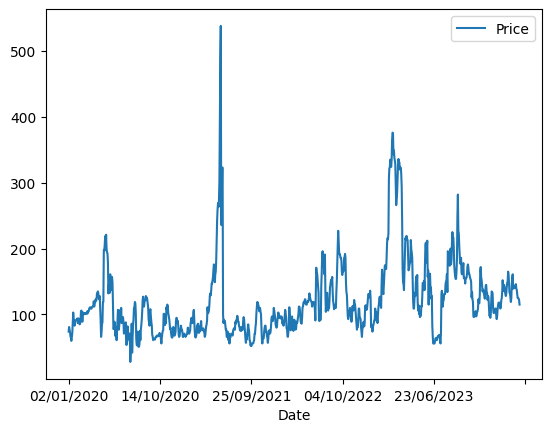

In [5]:
price2.plot()

In [6]:
price['Training'] = price['Price'].shift(-15).values
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      988 non-null    object 
 1   Price     988 non-null    int64  
 2   Training  973 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.3+ KB


Lo que vamos a hacer ahora es completar los valores que faltan con la moda del precio, es decir, el valor que más aparece.

In [7]:
price['Training'] = price['Training'].fillna(price['Price'].mode()[0])

In [8]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      988 non-null    object 
 1   Price     988 non-null    int64  
 2   Training  988 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.3+ KB


In [9]:
price = price.rename(columns = {'Price':'Target'})
price.head()

,Date,Target,Training
0,02/01/2020,74,91.0
1,03/01/2020,81,91.0
2,04/01/2020,77,92.0
3,07/01/2020,73,93.0
4,08/01/2020,67,94.0


In [10]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      988 non-null    object 
 1   Target    988 non-null    int64  
 2   Training  988 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.3+ KB


In [12]:
price['Target'] = price['Target'].astype(float)
price.head()

,Date,Target,Training
0,02/01/2020,74.0,91.0
1,03/01/2020,81.0,91.0
2,04/01/2020,77.0,92.0
3,07/01/2020,73.0,93.0
4,08/01/2020,67.0,94.0


In [159]:
X = final.drop('Target', axis = 1)[:100]
y = final['Target'][:100]

In [160]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [161]:
lr = LinearRegression()

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state= 123) 

Ahora mimso estamos utilizando 30 días de entrenamiento para predecir los próximos 70 días.

In [163]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30, 11), (70, 11), (30,), (70,))

In [164]:
lr.fit(X_train, y_train)

LinearRegression()

In [165]:
predictions = lr.predict(X_test)

In [166]:
test = abs(predictions - y_test)
print(np.mean(test))

24.400420578806187


In [167]:
outcome = mean_absolute_error(predictions, y_test)
print(f"El error medio absoluto es de {round((outcome/100), 2)}€.")

El error medio absoluto es de 0.24€.


In [168]:
test.describe()

count     70.000000
mean      24.400421
std       24.030914
min        0.090210
25%        6.449341
50%       18.810606
75%       32.716774
max      113.932296
Name: Target, dtype: float64

Si con 30 días queremos predecir 70 días, tenemos un error medio de 24 céntimos.